In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import loader
import plot
import helpers
import importlib
import joblib
importlib.reload(loader)
importlib.reload(plot)
importlib.reload(helpers)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score, train_test_split, StratifiedKFold, learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import RMSprop
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

In [3]:
data = loader.load_adult_data()
data.shape

(32561, 109)

In [4]:
features = [col for col in data.columns if col != "target"]
X = data[features]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [5]:
# Normalize input data
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.fit_transform(X_test)

In [6]:
rbf = SVC(kernel='rbf', random_state=1)
C = np.logspace(-3, 2, 6)
max_iter = np.logspace(1, 4, 4)
gamma = np.logspace(-4, 1, 6)
param_grid = dict(C=C, max_iter=max_iter, gamma=gamma)

rbf_grid_search = GridSearchCV(
    estimator=rbf,
    param_grid=param_grid,
    return_train_score=True,
    cv=5,
    verbose=1,
)
rbf_grid_result = rbf_grid_search.fit(X_train_norm, y_train)
rbf_res = rbf_grid_result.cv_results_
rbf_res_df = helpers.scikit_cv_result_to_df(rbf_res)
rbf_res_df.sort_values(by='rank_test_score')
joblib.dump(rbf_res_df, 'adult_rbf_grid_cv_res_df.pkl')

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxSca

NameError: name 'joblib' is not defined

In [9]:
joblib.dump(rbf_res_df, 'adult_rbf_grid_cv_res_df.pkl')

['adult_rbf_grid_cv_res_df.pkl']

In [10]:
poly = SVC(kernel='poly', random_state=1)
C = np.logspace(-3, 2, 6)
max_iter = np.logspace(1, 4, 4)
gamma = np.logspace(-4, 1, 6)
param_grid = dict(C=C, max_iter=max_iter, gamma=gamma)

poly_grid_search = GridSearchCV(
    estimator=poly,
    param_grid=param_grid,
    return_train_score=True,
    cv=5,
    verbose=1,
)
poly_grid_result = poly_grid_search.fit(X_train_norm, y_train)
poly_res = poly_grid_result.cv_results_
poly_res_df = helpers.scikit_cv_result_to_df(poly_res)
poly_res_df.sort_values(by='rank_test_score')
joblib.dump(poly_res_df, 'adult_poly_grid_cv_res_df.pkl')

Fitting 5 folds for each of 144 candidates, totalling 720 fits


/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/Users/eoh/opt/anaconda3/envs/school/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxSca

['adult_poly_grid_cv_res_df.pkl']

<AxesSubplot:xlabel='C', ylabel='gamma'>

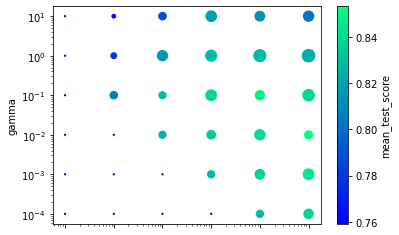

In [15]:
rbf10000 = rbf_res_df.xs(10000.0, level='max_iter').reset_index()
rbf10000.plot(kind='scatter', x='C', y='gamma', c='mean_test_score',s=rbf10000['std_test_score']*20000, cmap='winter', logx=True, logy=True)

In [16]:
rbf_validation_curve1 = rbf_res_df.xs((10000.0, 0.001), level=('max_iter', 'gamma'))
rbf_validation_curve2 = rbf_res_df.xs((10000.0, 0.01), level=('max_iter', 'gamma'))
rbf_validation_curve3 = rbf_res_df.xs((10000.0, .1), level=('max_iter', 'gamma'))

In [27]:
rbf_validation_curve1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
C,,,,,,,,,
0.001,19.725501,0.479609,10.380097,0.288634,0.759170,0.000081,42,0.759170,0.000020
0.010,21.682992,0.874321,11.436577,0.509056,0.759170,0.000081,42,0.759170,0.000020
0.100,21.501894,0.218189,11.435933,0.119030,0.759170,0.000081,42,0.759170,0.000020
1.000,21.578053,0.381463,10.738850,0.174286,0.826957,0.002660,14,0.827527,0.001559
10.000,12.169467,0.214926,5.251060,0.066380,0.836171,0.004731,7,0.837322,0.001244
100.000,11.670641,0.130010,5.349519,0.090619,0.843805,0.005802,3,0.845659,0.001492


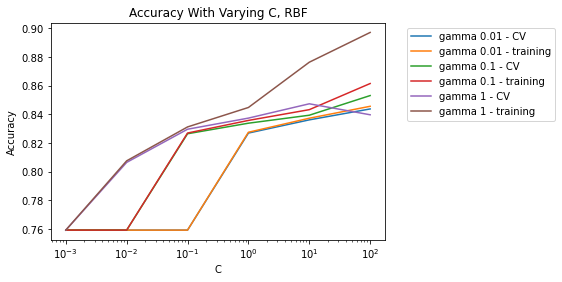

In [19]:
plt.plot(C, rbf_validation_curve1['mean_test_score'], label='gamma 0.01 - CV')
plt.plot(C, rbf_validation_curve1['mean_train_score'],  label='gamma 0.01 - training')
plt.plot(C, rbf_validation_curve2['mean_test_score'], label='gamma 0.1 - CV')
plt.plot(C, rbf_validation_curve2['mean_train_score'],  label='gamma 0.1 - training')
plt.plot(C, rbf_validation_curve3['mean_test_score'], label='gamma 1 - CV')
plt.plot(C, rbf_validation_curve3['mean_train_score'],  label='gamma 1 - training')
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.semilogx()
plt.title('Accuracy With Varying C, RBF')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.show()

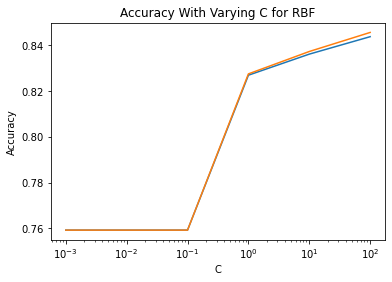

In [18]:
plt.plot(C, rbf_validation_curve1['mean_test_score'], label='gamma 0.01 - CV')
plt.plot(C, rbf_validation_curve1['mean_train_score'],  label='gamma 0.01 - training')
plt.semilogx()
plt.title('Accuracy With Varying C for RBF')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.show()

In [20]:
poly_validation_curve1 = poly_res_df.xs((10000.0, 0.001), level=('max_iter', 'gamma'))
poly_validation_curve2 = poly_res_df.xs((10000.0, 0.01), level=('max_iter', 'gamma'))
poly_validation_curve3 = poly_res_df.xs((10000.0, .1), level=('max_iter', 'gamma'))

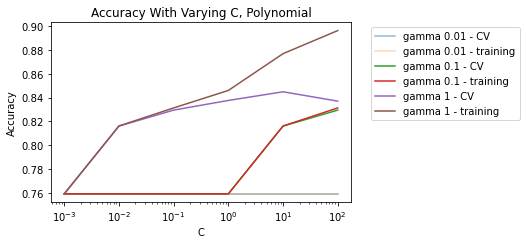

In [26]:
plt.plot(C, poly_validation_curve1['mean_test_score'], alpha=0.5, label='gamma 0.01 - CV')
plt.plot(C, poly_validation_curve1['mean_train_score'], alpha=0.3,  label='gamma 0.01 - training')
plt.plot(C, poly_validation_curve2['mean_test_score'], label='gamma 0.1 - CV')
plt.plot(C, poly_validation_curve2['mean_train_score'],  label='gamma 0.1 - training')
plt.plot(C, poly_validation_curve3['mean_test_score'], label='gamma 1 - CV')
plt.plot(C, poly_validation_curve3['mean_train_score'],  label='gamma 1 - training')
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.semilogx()
plt.title('Accuracy With Varying C, Polynomial')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.show()